In [2]:
# main.py

import polars as pl
import os

from src.futuapi.futu_api import FutuApi
from src.calculator.mathmatics import add_mean, add_boll

# 设置 Polars 显示的最大行数和列数
# pl.Config.set_tbl_width(1000)  # 设置表格的最大宽度，单位为字符
pl.Config.set_tbl_cols(100)  # 设置显示的最大列数
pl.Config.set_tbl_rows(10)  # 设置显示的最大行数


def trans(df):
    df = df.with_columns(
        pl.col("time_key").str.strptime(pl.Datetime, format="%Y-%m-%d %H:%M:%S")
    )
    df = df.with_columns(
        [
            pl.col("time_key").dt.date().cast(pl.Utf8).alias("date"),
            pl.col("time_key").dt.time().cast(pl.Utf8).alias("time"),
        ]
    )
    df = df.select(["code", "close", "change_rate", "date", "time"])

    close_df = df.filter(pl.col("time") == "15:00:00")
    check_point_df = df.filter(pl.col("time") == "14:55:00")

    df = (
        close_df.join(check_point_df, on=["code", "date"])
        .with_columns(
            [
                pl.col("close_right").cast(pl.Float64).alias("check_price"),
            ]
        )
        .select(["code", "date", "check_price", "close"])
    )

    df = df.with_columns(
        [
            (
                (pl.col("check_price") - pl.col("close").shift(5))
                / pl.col("close").shift(5)
            ).alias("del_5")
        ]
    )

    df = df.with_columns(
        [
            (
                (pl.col("check_price") - pl.col("close").shift(10))
                / pl.col("close").shift(5)
            ).alias("del_10")
        ]
    )
    
    print(df)

    return df


import time
from dataclasses import dataclass


@dataclass
class Record:
    code: str
    date: str
    price: float
    del_5: float
    del_10: float
    
api = FutuApi()
info = []
try:
    secs = [
        "SH.510880",
    ]


    for sec_id in secs:
        df = api.get_minute_kline(sec_id, "2019-01-01", "2024-11-08")
        df = trans(df)
        for row in df.iter_rows(named=True):
            # print(row)
            record = Record(
                date=row['date'],
                code=row["code"],
                price=row["check_price"],
                del_5=row["del_5"],
                del_10=row["del_10"],
            )
            info.append(record)

    # print(info["2024-11-08"])
finally:
    api.close()

/home/grasszhang/workspace/projects/gluttonous
2024-11-20 02:48:41,869 | 374353 | [open_context_base.py] _send_init_connect_sync:311: InitConnect ok: conn_id=1, host=127.0.0.1, port=11111, user_id=13389358
Error retrieving trading days: Invalid time period
Trading days saved to /data/futu/A-shares/cfg/trading_days.toml


Processing trading days:   0%|          | 0/1419 [00:00<?, ?it/s]

Processing trading days: 100%|██████████| 1419/1419 [00:01<00:00, 749.05it/s]

shape: (1_419, 6)
┌───────────┬────────────┬─────────────┬───────┬───────────┬───────────┐
│ code      ┆ date       ┆ check_price ┆ close ┆ del_5     ┆ del_10    │
│ ---       ┆ ---        ┆ ---         ┆ ---   ┆ ---       ┆ ---       │
│ str       ┆ str        ┆ f64         ┆ f64   ┆ f64       ┆ f64       │
╞═══════════╪════════════╪═════════════╪═══════╪═══════════╪═══════════╡
│ SH.510880 ┆ 2019-01-02 ┆ 1.801       ┆ 1.801 ┆ null      ┆ null      │
│ SH.510880 ┆ 2019-01-03 ┆ 1.794       ┆ 1.794 ┆ null      ┆ null      │
│ SH.510880 ┆ 2019-01-04 ┆ 1.828       ┆ 1.828 ┆ null      ┆ null      │
│ SH.510880 ┆ 2019-01-07 ┆ 1.853       ┆ 1.853 ┆ null      ┆ null      │
│ SH.510880 ┆ 2019-01-08 ┆ 1.858       ┆ 1.858 ┆ null      ┆ null      │
│ …         ┆ …          ┆ …           ┆ …     ┆ …         ┆ …         │
│ SH.510880 ┆ 2024-11-04 ┆ 3.191       ┆ 3.189 ┆ -0.016641 ┆ -0.012635 │
│ SH.510880 ┆ 2024-11-05 ┆ 3.214       ┆ 3.218 ┆ 0.004375  ┆ -0.009375 │
│ SH.510880 ┆ 2024-11-06 ┆ 3.188 

2019-01-02 1 1.8028009999999997 1.801 -0.09990009990008275%
2019-01-03 2 1.7985967999999999 1.794 -0.25557701425910295%
2019-01-04 3 1.8103084999999999 1.828 0.9772643723431713%
2019-01-07 4 1.8192173999999999 1.853 1.8569853168730788%
2019-01-08 5 1.8285959999999999 1.858 1.6080096423704475%
2019-01-09 6 1.8374606249999998 1.874 1.9885800273951446%
2019-01-10 7 1.8419453684210523 1.864 1.197355359016612%
2019-01-11 8 1.8450813333333334 1.873 1.5131401614816014%
2019-01-14 9 1.8489304166666667 1.874 1.3558965284659052%
2019-01-15 10 1.8525429999999998 1.894 2.237842792313046%
2019-01-16 11 1.8572346896551721 1.896 2.0872596533303636%
2019-01-17 12 1.8605774687499996 1.891 1.635112311149257%
2019-01-18 13 1.8642447352941174 1.921 3.0444106200964427%
2019-01-21 14 1.869895054054054 1.932 3.3213064985277327%
2019-01-22 15 1.872745875 1.906 1.7756880655257277%
2019-01-23 16 1.8746108333333331 1.91 1.8878140485158497%
2019-01-24 17 1.877631311111111 1.918 2.149979532723094%
2019-01-25 18 1.

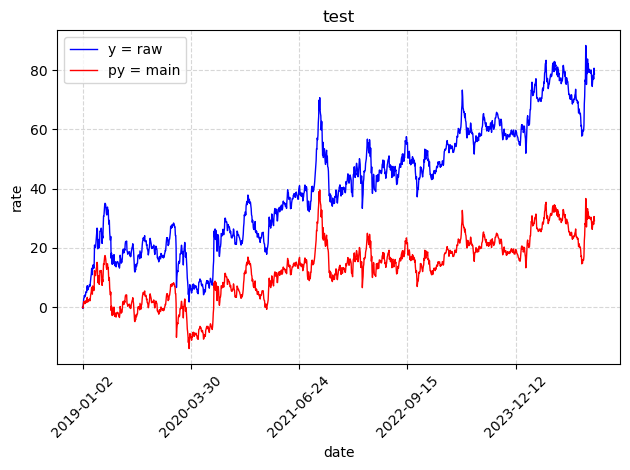

In [11]:
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


def truncate_float(number):
    """
    截断浮点数到指定的小数位数，不进行四舍五入。

    :param number: 要截断的浮点数
    :param decimals: 小数位数
    :return: 截断后的浮点数
    """
    factor = 10.0**-2
    truncated = math.trunc(number * factor) / factor
    return truncated


day_count = 0
total = 0
input = 0
postion = 0
least = 0

init_price = 0.0

y = []
py = []
x = []

for record in info:
    if record.price == 0.0:
        continue

    if init_price == 0.0:
        init_price = record.price

    day_count = day_count + 1
    input += 500

    least += 500
    cur_position = truncate_float(least / record.price)
    postion += cur_position
    least -= (cur_position * record.price) * 1.001
    total = postion * record.price
    print(
        record.date,
        day_count,
        (input - least) / postion,
        record.price,
        f"{total / (input - least) * 100 - 100}%",
    )

    x.append(record.date)
    y.append(record.price * 100 / init_price - 100)
    py.append(total / (input - least) * 100 - 100)


ax = plt.gca()  # 获取当前轴对象
ax.xaxis.set_major_locator(MaxNLocator(integer=True, prune='both', nbins=6))  # 自动选择6个关键点显示


plt.plot(x, y, linestyle="-", linewidth=1, color="b", label="y = raw")
plt.plot(x, py, linestyle="-", linewidth=1, color="r", label="py = main")
plt.title("test")
plt.xlabel("date")
plt.ylabel("rate")
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
# 显示图例
plt.legend()

# 显示图形
plt.show()